In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import solar

In [3]:
newark_weather = pd.read_csv('./data/weather/newark_weather.csv', index_col='Unnamed: 0')
newark_weather.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
2006-01-02 00:00:00,36.81,0.82,31.40,0.81,partly-cloudy-night,NaN,0.0,0.0,NaN,1022.75,Mostly Cloudy,36.81,0,10.00,246,1.86,1.75
2006-01-02 01:00:00,35.79,0.22,30.80,0.82,clear-night,NaN,0.0,0.0,NaN,1022.80,Clear,35.79,0,10.00,234,2.22,1.86
2006-01-02 02:00:00,35.67,0.32,30.43,0.81,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.57,Partly Cloudy,35.67,0,10.00,216,2.01,1.55
2006-01-02 03:00:00,35.49,0.50,30.64,0.82,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.57,Partly Cloudy,35.49,0,9.74,225,1.11,0.81
2006-01-02 04:00:00,35.66,0.88,31.25,0.84,partly-cloudy-night,NaN,0.0,0.0,NaN,1023.31,Mostly Cloudy,35.66,0,9.68,216,0.66,0.63


In [4]:
newark_pysolar = pd.read_csv('./data/pysolar/newark_pysolar.csv', index_col='Unnamed: 0')
newark_pysolar.head()

,YYYY-MM-DD,HH:MM (LST),Zenith (deg),Azimuth (deg),ETR (Wh/m^2),ETRN (Wh/m^2),Glo Mod (Wh/m^2),Glo Mod Unc (%),Glo Mod Source,Dir Mod (Wh/m^2),...,Ceil Hgt Flg,Liq Precip Depth (mm),Liq Precip Depth Flg,Liq Precip Quantity (hours),Liq Precip Quantity Flg,Precip Wat (cm),Precip Wat Flg,AOD (unitless),AOD Flg,clear_sky
2006-01-01 01:00:00,2006-01-01,1:00,99.0,-99.0,0,0,0,0,2,0,...,1,0,5,1,99,1.2,3,0.088,1,0.0
2006-01-01 02:00:00,2006-01-01,2:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.2,51,0.088,1,0.0
2006-01-01 03:00:00,2006-01-01,3:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.1,51,0.088,1,0.0
2006-01-01 04:00:00,2006-01-01,4:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.1,3,0.088,1,0.0
2006-01-01 05:00:00,2006-01-01,5:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.1,51,0.088,1,0.0


In [5]:
newark_pysolar.columns

Index(['YYYY-MM-DD', 'HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)',
       'ETR (Wh/m^2)', 'ETRN (Wh/m^2)', 'Glo Mod (Wh/m^2)', 'Glo Mod Unc (%)',
       'Glo Mod Source', 'Dir Mod (Wh/m^2)', 'Dir Mod Unc (%)',
       'Dir Mod Source', 'Dif Mod (Wh/m^2)', 'Dif Mod Unc (%)',
       'Dif Mod Source', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'TotCC (10ths)', 'TotCC Flg', 'OpqCC (10ths)',
       'OpqCC Flg', 'Dry Bulb (C)', 'Dry Bulb Flg', 'Dew Pnt (C)',
       'Dew Pnt Flg', 'Rel Hum (%)', 'Rel Hum Flg', 'Baro Press (mbar)',
       'Baro Press Flg', 'Wind Speed (m/s)', 'Wind Speed Flg',
       'Wind Dir (deg)', 'Wind Dir Flg', 'Hor Vis (m)', 'Hor Vis Flg',
       'Ceil Hgt (m)', 'Ceil Hgt Flg', 'Liq Precip Depth (mm)',
       'Liq Precip Depth Flg', 'Liq Precip Quantity (hours)',
       'Liq Precip Quantity Flg', 'Precip Wat (cm)', 'Precip Wat Flg',
       'AOD (unitless)', 'AOD Flg', 'clear_sky'],
      

In [6]:
newark_pysolar['yesterday'] = newark_pysolar["Glo Mod (Wh/m^2)"].shift(24).fillna(0)

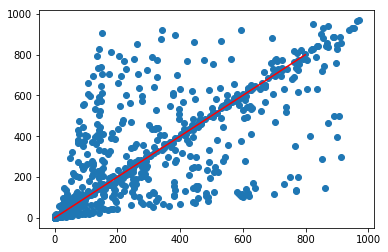

In [7]:
plt.scatter(newark_pysolar['yesterday'][24*7::35], newark_pysolar["Glo Mod (Wh/m^2)"][24*7::35]);
plt.plot(range(0, 800), range(0, 800), c='red')

In [8]:
newark_pysolar["avg_last_week"] = newark_pysolar['yesterday']
for i in range(2, 8):
    newark_pysolar["avg_last_week"] += newark_pysolar["Glo Mod (Wh/m^2)"].shift(24*i)
newark_pysolar["avg_last_week"] = newark_pysolar["avg_last_week"] / 7

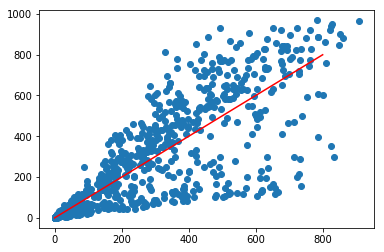

In [9]:
plt.scatter(newark_pysolar['avg_last_week'][24*7::35], newark_pysolar["Glo Mod (Wh/m^2)"][24*7::35]);
plt.plot(range(0, 800), range(0, 800), c='red')

In [10]:
newark_pysolar["median_week_1"] = newark_pysolar['yesterday']
for i in range(2, 8):
    newark_pysolar["median_week_" + str(i)] = newark_pysolar["Glo Mod (Wh/m^2)"].shift(24*i)
newark_pysolar.iloc[24*7:]

,YYYY-MM-DD,HH:MM (LST),Zenith (deg),Azimuth (deg),ETR (Wh/m^2),ETRN (Wh/m^2),Glo Mod (Wh/m^2),Glo Mod Unc (%),Glo Mod Source,Dir Mod (Wh/m^2),...,clear_sky,yesterday,avg_last_week,median_week_1,median_week_2,median_week_3,median_week_4,median_week_5,median_week_6,median_week_7
2006-01-08 01:00:00,2006-01-08,1:00,99.0,-99.0,0,0,0,0,2,0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-08 02:00:00,2006-01-08,2:00,99.0,-99.0,0,0,0,0,2,0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-08 03:00:00,2006-01-08,3:00,99.0,-99.0,0,0,0,0,2,0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-08 04:00:00,2006-01-08,4:00,99.0,-99.0,0,0,0,0,2,0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-08 05:00:00,2006-01-08,5:00,99.0,-99.0,0,0,0,0,2,0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-08 06:00:00,2006-01-08,6:00,99.0,-99.0,0,0,0,0,2,0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-08 07:00:00,2006-01-08,7:00,99.0,-99.0,0,0,0,0,2,0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-08 08:00:00,2006-01-08,8:00,87.2,122.5,43,884,12,9,2,152,...,250.182363,12.0,9.857143,12.0,10.0,9.0,12.0,2.0,12.0,12.0
2006-01-08 09:00:00,2006-01-08,9:00,80.1,131.1,244,1415,142,9,2,497,...,682.064957,137.0,114.000000,137.0,111.0,107.0,141.0,23.0,140.0,139.0
2006-01-08 10:00:00,2006-01-08,10:00,72.4,143.0,429,1415,277,9,2,682,...,829.973565,279.0,192.857143,279.0,72.0,95.0,287.0,130.0,286.0,201.0


In [11]:
last_week = newark_pysolar[['median_week_' + str(i) for i in range(1, 8)]]

In [12]:
medians = last_week.median(axis=1)

In [13]:
newark_pysolar.drop(columns=['median_week_' + str(i) for i in range(1, 8)], inplace=True)

In [14]:
newark_pysolar['last_week_median'] = medians

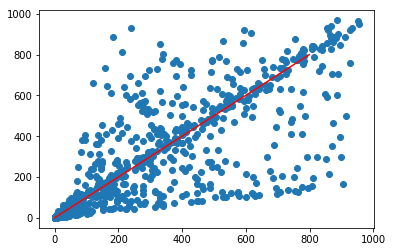

In [15]:
plt.scatter(newark_pysolar['last_week_median'][24*7::35], newark_pysolar["Glo Mod (Wh/m^2)"][24*7::35]);
plt.plot(range(0, 800), range(0, 800), c='red');

In [16]:
newark = newark_weather.merge(newark_pysolar, left_index=True, right_index=True)
newark.columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'precipAccumulation', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed', 'YYYY-MM-DD',
       'HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'Glo Mod (Wh/m^2)', 'Glo Mod Unc (%)',
       'Glo Mod Source', 'Dir Mod (Wh/m^2)', 'Dir Mod Unc (%)',
       'Dir Mod Source', 'Dif Mod (Wh/m^2)', 'Dif Mod Unc (%)',
       'Dif Mod Source', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'TotCC (10ths)', 'TotCC Flg', 'OpqCC (10ths)',
       'OpqCC Flg', 'Dry Bulb (C)', 'Dry Bulb Flg', 'Dew Pnt (C)',
       'Dew Pnt Flg', 'Rel Hum (%)', 'Rel Hum Flg', 'Baro Press (mbar)',
       'Baro Press Flg', 'Wind Speed (m/s)', 'Wind Speed Flg',
       'Wind Dir (deg)', 'Wind Dir Flg', 'Hor Vi

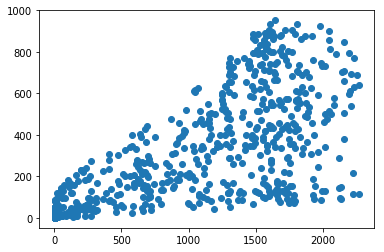

In [17]:
plt.scatter(np.exp(np.sqrt(newark['clear_sky'][24*7::35]))**(1/4), newark["Glo Mod (Wh/m^2)"][24*7::35]);


/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


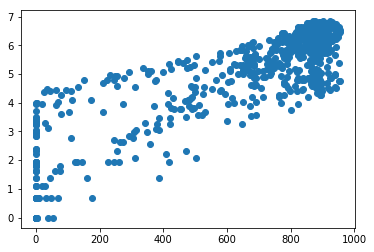

In [18]:
plt.scatter(newark['clear_sky'][24*7::35], np.log(newark["Glo Mod (Wh/m^2)"][24*7::35]));

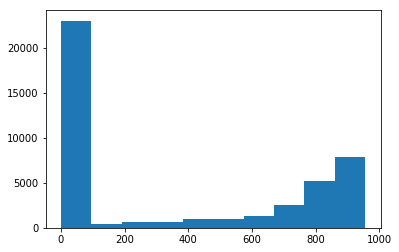

In [19]:
plt.hist(newark['clear_sky']);

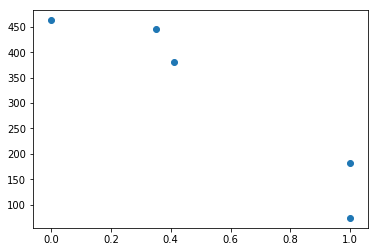

In [20]:
plt.scatter(newark['cloudCover'][12::365*24], newark["Glo Mod (Wh/m^2)"][12::365*24]);

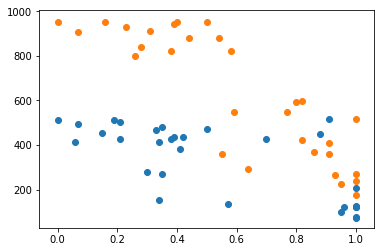

In [21]:
plt.scatter(newark['cloudCover'][12:720:24], newark["Glo Mod (Wh/m^2)"][12:720:24]);
plt.scatter(newark['cloudCover'][3612:4320:24], newark["Glo Mod (Wh/m^2)"][3612:4320:24]);

In [22]:
5*30*24 + 12

3612

In [23]:
3600+720

4320

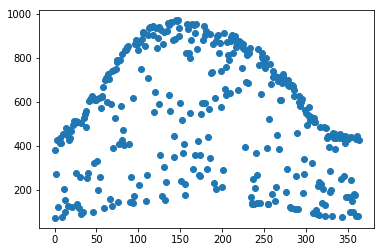

In [24]:
first_year = newark[12:24*364:24]
plt.scatter(range(len(first_year)), first_year['Glo Mod (Wh/m^2)'])

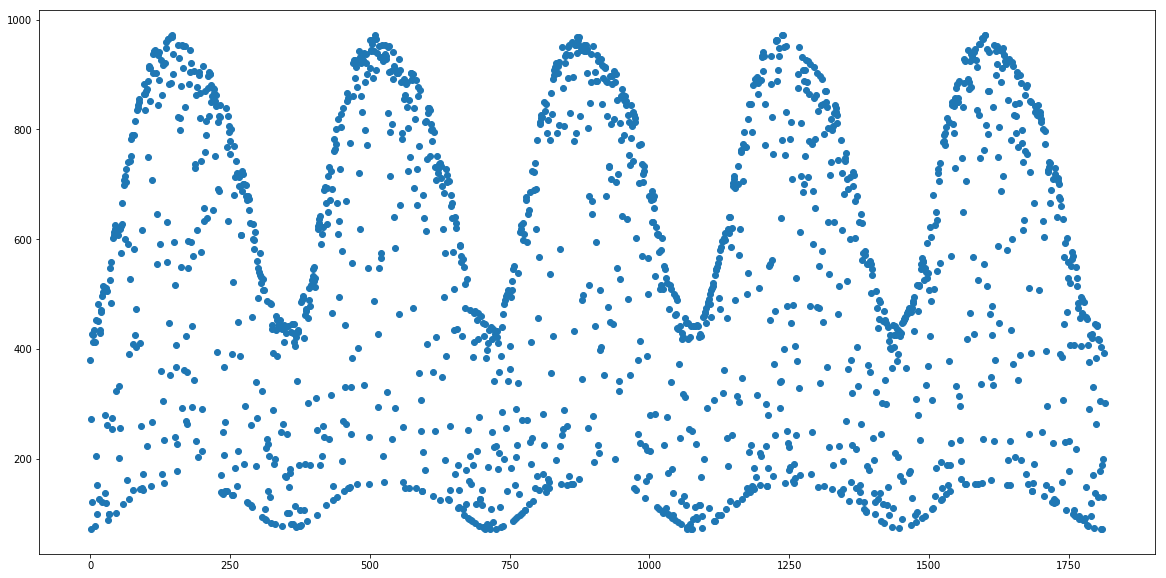

In [25]:
plt.figure(figsize=(20, 10))
all_noons = newark[12::24]
plt.scatter(range(len(all_noons)), all_noons['Glo Mod (Wh/m^2)'])

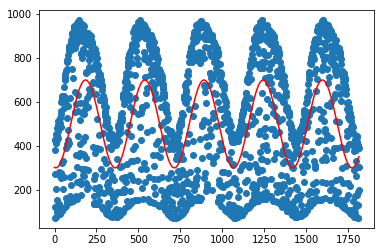

In [60]:
plt.scatter(range(len(all_noons)), all_noons['Glo Mod (Wh/m^2)'])
plt.plot(range(len(all_noons)), 200*np.sin(0.0178*np.array(range(len(all_noons))) - 8) + 500, c='red')

In [61]:
sin_wave = 200*np.sin(0.0178*np.array(range(len(all_noons))) - 8) + 500

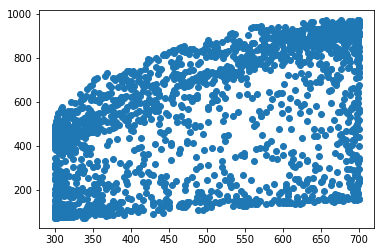

In [62]:
plt.scatter(sin_wave, all_noons['Glo Mod (Wh/m^2)'])

In [72]:
not_cloudy = all_noons[all_noons['cloudCover'] < 0.15]

In [73]:
len(not_cloudy)

389

In [74]:
not_cloudy.columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'precipAccumulation', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed', 'YYYY-MM-DD',
       'HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'Glo Mod (Wh/m^2)', 'Glo Mod Unc (%)',
       'Glo Mod Source', 'Dir Mod (Wh/m^2)', 'Dir Mod Unc (%)',
       'Dir Mod Source', 'Dif Mod (Wh/m^2)', 'Dif Mod Unc (%)',
       'Dif Mod Source', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'TotCC (10ths)', 'TotCC Flg', 'OpqCC (10ths)',
       'OpqCC Flg', 'Dry Bulb (C)', 'Dry Bulb Flg', 'Dew Pnt (C)',
       'Dew Pnt Flg', 'Rel Hum (%)', 'Rel Hum Flg', 'Baro Press (mbar)',
       'Baro Press Flg', 'Wind Speed (m/s)', 'Wind Speed Flg',
       'Wind Dir (deg)', 'Wind Dir Flg', 'Hor Vi

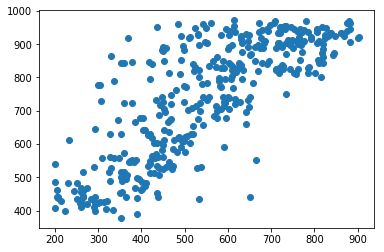

In [77]:
plt.scatter(not_cloudy['avg_last_week'], not_cloudy['Glo Mod (Wh/m^2)']);

In [80]:
newark.to_csv('./data/newark_merged.csv')

In [87]:
x_axis = pd.to_datetime(not_cloudy.index.values).astype(int)

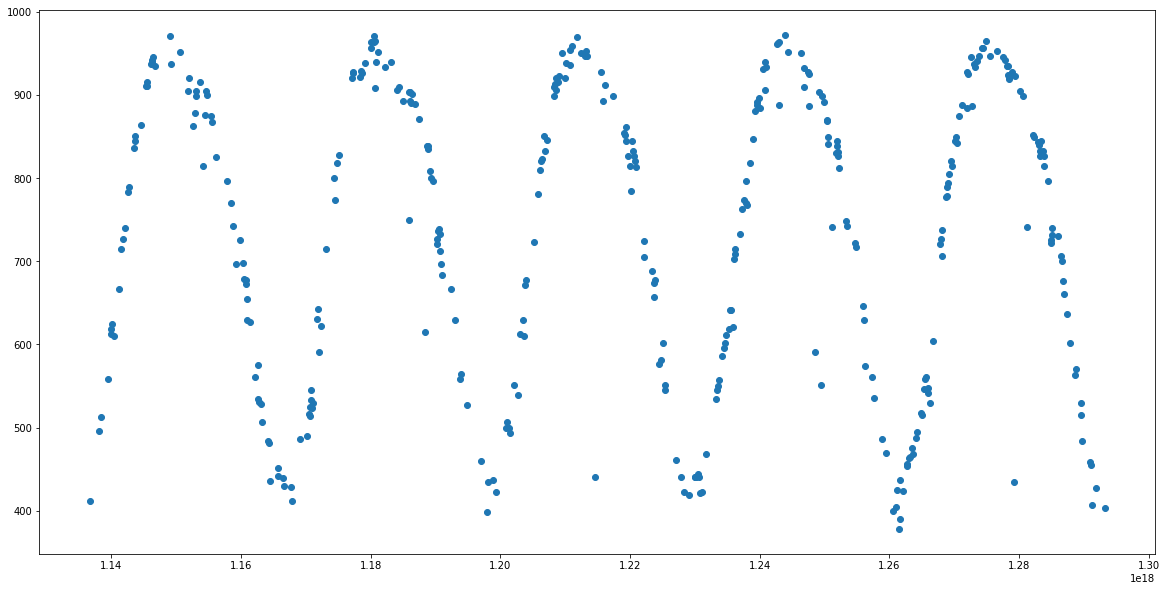

In [90]:
plt.figure(figsize=(20, 10))
plt.scatter(x_axis, not_cloudy['Glo Mod (Wh/m^2)']);